## @author - Pardeep
## transfer learning model using MobileNetV2
### reference :- https://keras.io/api/applications/mobilenet/#mobilenetv2-function

# Data Preprocessing

In [22]:
from keras.preprocessing.image import ImageDataGenerator

### Preprocessing the Training set

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('Segmented Medicinal Leaf Images',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1957 images belonging to 30 classes.


### Preprocessing the Test set

In [24]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'C:\Users\parde\Downloads\Project Workspace\few shot\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1535 images belonging to 30 classes.


### Preprocessing the val set

In [25]:
test_datagen = ImageDataGenerator(rescale = 1./255)
val_set = test_datagen.flow_from_directory(r'C:\Users\parde\Downloads\Project Workspace\few shot\val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 150 images belonging to 30 classes.


# importing transfer learning model

In [26]:
# import necessary library
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Sequential
from keras.layers import *

In [27]:
# load and creare a model object
v2model = MobileNetV2(input_shape=[224,224,3], weights='imagenet', include_top=False)
# model summary
#v2model.summary()

# preprocessing pre trained model

In [28]:
for layer in v2model.layers:
    layer.trainable = False

## adding layer for flattening the outputs from previous layers

In [29]:
x = Flatten()(v2model.output)

## adding layer for classification

In [30]:
from glob import glob

In [31]:
prediction = Dense(30, activation='softmax')(x)

In [32]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model

In [33]:
# create a model object
model = Model(inputs=v2model.input, outputs=prediction)

In [34]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

# Training the transfer learning model

### Compiling the CNN

In [35]:
model.compile(optimizer = 'adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

### To avoid model to overfitting 

In [36]:
from keras.callbacks import EarlyStopping

In [37]:
earlystop = EarlyStopping(monitor='accuracy', patience=3, verbose=2)

### Training the CNN on the Training set and evaluating it on the Test set

In [38]:
a= model.fit(training_set, validation_data = val_set,callbacks= earlystop,epochs = 20)

Epoch 1/20
62/62 [==============================] - 81s 1s/step - loss: 9.6623 - accuracy: 0.4984 - val_loss: 0.5949 - val_accuracy: 0.9333
Epoch 2/20
62/62 [==============================] - 71s 1s/step - loss: 1.2332 - accuracy: 0.9184 - val_loss: 0.1824 - val_accuracy: 0.9800
Epoch 3/20
62/62 [==============================] - 75s 1s/step - loss: 0.5919 - accuracy: 0.9410 - val_loss: 0.2446 - val_accuracy: 0.9867
Epoch 4/20
62/62 [==============================] - 73s 1s/step - loss: 0.5978 - accuracy: 0.9538 - val_loss: 0.1627 - val_accuracy: 0.9733
Epoch 5/20
62/62 [==============================] - 73s 1s/step - loss: 0.3827 - accuracy: 0.9625 - val_loss: 0.7304 - val_accuracy: 0.9533
Epoch 6/20
62/62 [==============================] - 72s 1s/step - loss: 0.3877 - accuracy: 0.9698 - val_loss: 0.3095 - val_accuracy: 0.9733
Epoch 7/20
62/62 [==============================] - 79s 1s/step - loss: 0.3522 - accuracy: 0.9709 - val_loss: 0.3729 - val_accuracy: 0.9533
Epoch 8/20
62/62 [==

## Making a single prediction

In [39]:
from tensorflow import keras
import tensorflow as tf

In [40]:
img = keras.preprocessing.image.load_img(
    "Segmented Medicinal Leaf Images/Citrus Limon (Lemon)/CL-S-013.jpg", target_size=(224,224,3)
)
img_array = keras.preprocessing.image.img_to_array(img)/255
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
result = predictions[0]

In [41]:
if result[0] == result.max():
  prediction = 'Alpinia Galanga (Rasna)'
elif result[1] == result.max():
    prediction = 'Amaranthus Viridis (Arive-Dantu)'
elif result[2] == result.max():
    prediction = 'Artocarpus Heterophyllus (Jackfruit)'
elif result[3] == result.max():
    prediction = 'Azadirachta Indica (Neem)'
elif result[4] == result.max():
    prediction = 'Basella Alba (Basale)'
elif result[5] == result.max():
    prediction = 'Brassica Juncea (Indian Mustard)'
elif result[6] == result.max():
    prediction = 'Carissa Carandas (Karanda)'
elif result[7] == result.max():
    prediction = 'Citrus Limon (Lemon)'
elif result[8] == result.max():
    prediction = 'Ficus Auriculata (Roxburgh fig)'
elif result[9] == result.max():
    prediction = 'Ficus Religiosa (Peepal Tree)'
elif result[10] == result.max():
    prediction = 'Hibiscus Rosa-sinensis'
elif result[11] == result.max():
    prediction = 'Jasminum (Jasmine)'
elif result[12] == result.max():
    prediction = 'Mangifera Indica (Mango)'
elif result[12] == result.max():
    prediction = 'Mentha (Mint)'
elif result[14] == result.max():
    prediction = 'Moringa Oleifera (Drumstick)'
elif result[15] == result.max():
    prediction = 'Muntingia Calabura (Jamaica Cherry-Gasagase)'
elif result[16] == result.max():
    prediction = 'Murraya Koenigii (Curry)'
elif result[17] == result.max():
    prediction = 'Nerium Oleander (Oleander)'
elif result[18] == result.max():
    prediction = 'Nyctanthes Arbor-tristis (Parijata)'
elif result[19] == result.max():
    prediction = 'Ocimum Tenuiflorum (Tulsi)'
elif result[20] == result.max():
    prediction = 'Piper Betle (Betel)'
elif result[21] == result.max():
    prediction = 'Plectranthus Amboinicus (Mexican Mint)'
elif result[22] == result.max():
    prediction = 'Pongamia Pinnata (Indian Beech)'
elif result[23] == result.max():
    prediction = 'Psidium Guajava (Guava)'
elif result[24] == result.max():
    prediction = 'Punica Granatum (Pomegranate)'
elif result[25] == result.max():
    prediction = 'Santalum Album (Sandalwood)'
elif result[26] == result.max():
    prediction = 'Syzygium Cumini (Jamun)'
elif result[27] == result.max():
    prediction = 'Syzygium Jambos (Rose Apple)'
elif result[28] == result.max():
    prediction = 'Tabernaemontana Divaricata (Crape Jasmine)'
else:
    prediction = 'Trigonella Foenum-graecum (Fenugreek)'

In [42]:
print(prediction)

Citrus Limon (Lemon)


### accuracy and losses

In [43]:
test_loss, test_acc =model.evaluate(test_set,verbose = 2)
print("Test accuracy: ",test_acc)

48/48 - 43s - loss: 0.1860 - accuracy: 0.9870
Test accuracy:  0.9869706630706787


In [44]:
print("Test loss: ",test_loss)

Test loss:  0.18603456020355225


In [45]:
import matplotlib.pyplot as plt

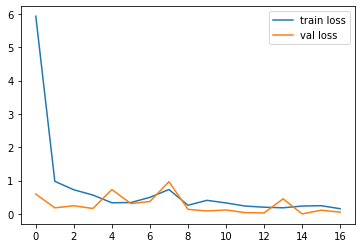

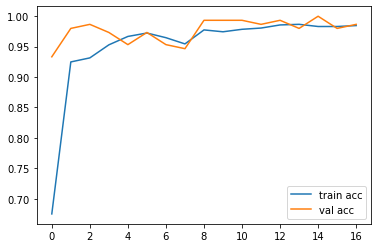

In [46]:
# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

## saving a model

In [47]:
import tensorflow as tf

from keras.models import load_model

model.save('mixeddatamobilenetv2.h5')

# This Trained over whole Dataset data and Randome Google fetched pics